## Problem 1

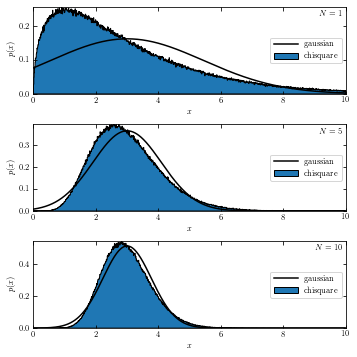

In [5]:
# import the libraries 
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Generate the chisquare samples
N = [1, 5, 10]
# degrees of freedom
df = 3
x = np.zeros((max(N), int(1E6)))
for i in range(max(N)):
    x[i]  = np.random.chisquare(df, int(1E6))
    
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i+1)

    # Calculate the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # Plot the histogram
    ax.hist(x_i, bins = np.linspace(0,10,1000), histtype = 'stepfilled', alpha = 1, density = True, label = 'chisquare')

    # Plot the expected gaussian pdf
    mu = x_i.mean()
    sigma = np.sqrt((2.0 * df)/N[i])
    x_pdf = np.linspace(0, 10, 1000)
    ax.plot(x_pdf, norm.pdf(x_pdf, mu, sigma), '-k', label = 'gaussian')
    ax.set_xlim(0.0, 10)
    plt.legend(loc = 'center right')
    ax.text(0.99, 0.95, r"$N = %i$" % N[i], ha = 'right', va = 'top', transform = ax.transAxes)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel('$p(x)$')

plt.tight_layout()
plt.show()

## Problem 2

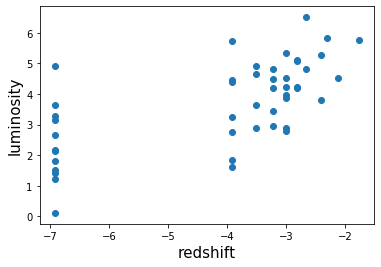

Spearman Correlation Coefficient:  0.6596325957535455
Pearson Correlation Coefficient:  0.5144497827002215
Kendalltau Correlation Coefficient:  0.5029584682704178
P Value Null Hypothesis:  2.6608199530211854e-06


In [2]:
# import the libraries 
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau, ttest_ind

# Read the data
file = open('data.txt', 'r')
lines = file.readlines()
file.close()
luminosity = []
redshift = []
for line in lines:
    if line != '#Lx z\n':
        luminosity.append(line.split(' ')[0])
        redshift.append(line.split(' ')[1])
        
luminosity = np.asarray(luminosity, dtype = np.float32)
redshift = np.asarray(redshift, dtype = np.float32)
plt.scatter(np.log(redshift), np.log(luminosity))
plt.xlabel('redshift', fontsize = 15)
plt.ylabel('luminosity', fontsize = 15)
plt.show()

spearman_corr_coeff, p = spearmanr(luminosity, redshift)
print("Spearman Correlation Coefficient: ", spearman_corr_coeff)

pearson_corr_coeff, p = pearsonr(luminosity, redshift)
print("Pearson Correlation Coefficient: ", pearson_corr_coeff)

kendalltau_corr_coeff, p = kendalltau(luminosity, redshift)
print("Kendalltau Correlation Coefficient: ", kendalltau_corr_coeff)

st, p_value = ttest_ind(luminosity, redshift)
print("P Value Null Hypothesis: ", p_value)

## Problem 3

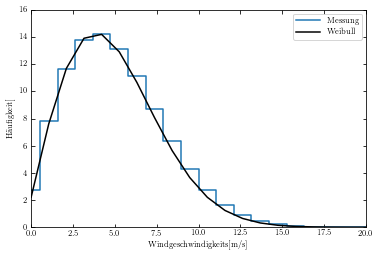

In [6]:
# import the libraries 
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import dweibull
x = np.linspace(0, 20, 20)
y = [2.75, 7.80, 11.64, 13.79, 14.20, 13.15, 11.14, 8.72, 6.34, 4.30, 2.73, 1.62, 0.91, 0.48, 0.24, 0.11, 0.05, 0.02, 0.01, 0.00]
plt.ylim(0, 16)
plt.plot(x, y, drawstyle = 'steps-mid', label = 'Messung')

# lambda = 6 and k = 2
dist = dweibull(2, -0.4, 6)
plt.plot(x, 200*dist.pdf(x), '-k', label = 'Weibull')
plt.xlabel('Windgeschwindigkeits[m/s]')
plt.ylabel('Häufigkeit[%]')
plt.legend()
plt.show()

## Problem 4

In [21]:
# import the libraries 
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, ttest_ind

mu, sigma = 0, 1
sample_1 = np.random.normal(mu, sigma, 1000)
sample_2 = np.random.normal(mu, sigma, 1000)

pearson_corr_coeff, p_value = pearsonr(sample_1, sample_2)
print("Pearson Correlation Coefficient: ", pearson_corr_coeff)
print("P Value: ", p_value)

st, p_value = ttest_ind(sample_1, sample_2)
print("P Value Null Hypothesis: ", p_value)


Pearson Correlation Coefficient:  -0.033951737409738385
P Value:  0.28344406656799775
P Value Null Hypothesis:  0.18095492319594297
